In [1]:
import tensorflow as tf
from keras.layers import Conv2D,MaxPool2D,SeparableConv2D,DepthwiseConv2D,MaxPooling2D,concatenate,AveragePooling2D,GlobalAveragePooling2D,Dropout,Dense,BatchNormalization,Activation,Flatten
from tensorflow.keras.layers import Conv2D,MaxPool2D,SeparableConv2D,DepthwiseConv2D,MaxPooling2D,concatenate,AveragePooling2D,GlobalAveragePooling2D,Dropout,Dense,BatchNormalization,Activation,Flatten
NUM_CLASSES=7

def DepthwiseSeparableConv2D(x, filters, kernel_size, strides, padding):
    x=SeparableConv2D(filters=filters,kernel_size=kernel_size,strides=strides,padding=padding)(x)
    x=BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def BasicConv2D(x, filters, kernel_size, strides, padding):
    x=Conv2D(filters=filters,kernel_size=kernel_size,strides=strides,padding=padding)(x)
    x=BatchNormalization()(x)
    x = Activation('relu')(x)
    return x
def inception_block_A(x):
    # Branch 1: Average Pooling -> 1x1 Conv
    branch1 = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch1 = BasicConv2D(branch1, filters=96,kernel_size=(1, 1),strides=1,padding="same")

    # Branch 2: 1x1 Conv
    branch2 = BasicConv2D(x,filters=96,kernel_size=(1, 1),strides=1,padding="same")

    # Branch 3: 1x1 Conv -> 3x3 Conv
    branch3 = BasicConv2D(x,filters=96,kernel_size=(1, 1),strides=1,padding="same")
    branch3 = DepthwiseSeparableConv2D(branch3, filters=96, kernel_size=(3, 3), strides=1, padding="same")

    # Branch 4: 1x1 Conv -> 3x3 Conv -> 3x3 Conv
    branch4 = BasicConv2D(x,filters=64,kernel_size=(1, 1),strides=1,padding="same")
    branch4 = DepthwiseSeparableConv2D(branch4, filters=96, kernel_size=(3, 3), strides=1, padding="same")
    branch4 = DepthwiseSeparableConv2D(branch4, filters=96, kernel_size=(3, 3), strides=1, padding="same")

    # Concatenating all the branches
    output = concatenate([branch1, branch2, branch3, branch4], axis=-1)
    return output

def inception_block_B(x):
    # Branch 1: Average Pooling -> 1x1 Conv
    branch1 = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')
    branch1 = BasicConv2D(x,filters=128,kernel_size=(1, 1),strides=1,padding="same")

    # Branch 2: 1x1 Conv
    branch2 = BasicConv2D(x,filters=384,kernel_size=(1, 1),strides=1,padding="same")

    # Branch 3: 1x1 Conv -> 1x7 Conv -> 7x1 Conv
    branch3 = BasicConv2D(x,filters=192,kernel_size=(1, 1),strides=1,padding="same")
    branch3 = DepthwiseSeparableConv2D(branch3, filters=224, kernel_size=(1, 7), strides=1, padding="same")
    branch3 = DepthwiseSeparableConv2D(branch3,filters=256,kernel_size=(7, 1),strides=1,padding="same")

    # Branch 4: 1x1 Conv -> 7x1 Conv -> 1x7 Conv -> 7x1 Conv -> 1x7 Conv
    branch4 = BasicConv2D(x,filters=192,kernel_size=(1, 1),strides=1,padding="same")
    branch4 = DepthwiseSeparableConv2D(branch4,filters=192,kernel_size=(1, 7),strides=1,padding="same")
    branch4 = DepthwiseSeparableConv2D(branch4,filters=224,kernel_size=(7, 1),strides=1,padding="same")
    branch4 = DepthwiseSeparableConv2D(branch4,filters=224,kernel_size=(1, 7),strides=1,padding="same")
    branch4 = DepthwiseSeparableConv2D(branch4,filters=256,kernel_size=(7, 1),strides=1,padding="same")

    # Concatenating all the branches
    output = concatenate([branch1, branch2, branch3, branch4], axis=-1)
    return output

def inception_block_C(x):
    # Branch 1: Average Pooling -> 1x1 Conv
    branch1 = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch1 = BasicConv2D(branch1,filters=256,kernel_size=(1, 1),strides=1,padding="same")

    # Branch 2: 1x1 Conv
    branch2 = BasicConv2D(x,filters=256,kernel_size=(1, 1),strides=1,padding="same")

    # Branch 3: 1x1 Conv -> 1x3 and 3x1 Conv
    branch3 = BasicConv2D(x,filters=384,kernel_size=(1, 1),strides=1,padding="same")
    branch3a = DepthwiseSeparableConv2D(branch3,filters=256,kernel_size=(1, 3),strides=1,padding="same")
    branch3b = DepthwiseSeparableConv2D(branch3,filters=256,kernel_size=(3, 1),strides=1,padding="same")
    branch3 = concatenate([branch3a, branch3b], axis=-1)

    # Branch 4: 1x1 Conv -> 3x3 Conv -> 1x3 and 3x1 Conv
    branch4 = BasicConv2D(x,filters=384,kernel_size=(1, 1),strides=1,padding="same")
    branch4 = DepthwiseSeparableConv2D(branch4,filters=448,kernel_size=(1, 3),strides=1,padding="same")
    branch4 = DepthwiseSeparableConv2D(branch4,filters=512,kernel_size=(3, 1),strides=1,padding="same")
    branch4a = DepthwiseSeparableConv2D(branch4,filters=256,kernel_size=(3, 1),strides=1,padding="same")
    branch4b = DepthwiseSeparableConv2D(branch4,filters=256,kernel_size=(1, 3),strides=1,padding="same")
    branch4 = concatenate([branch4a, branch4b], axis=-1)

    # Concatenating all the branches
    output = concatenate([branch1, branch2, branch3, branch4], axis=-1)
    return output
def reduction_A(x):
    # Branch 1: Max Pooling
    branch1 = MaxPooling2D(3, strides=2, padding='valid')(x)

    # Branch 2: 3x3 Conv

    branch2 = BasicConv2D(x, filters=384,kernel_size=(3, 3),strides=2,padding="valid")

    # Branch 3: 1x1 Conv -> 3x3 Conv -> 3x3 Conv

    branch3 = BasicConv2D(x, filters=192,kernel_size=(1, 1),strides=1,padding="same")
    branch3 = BasicConv2D(branch3, filters=224,kernel_size=(3, 3),strides=1,padding="same")
    branch3 = BasicConv2D(branch3, filters=256,kernel_size=(3, 3),strides=2,padding="valid")

    # Concatenating all the branches
    output = concatenate([branch1, branch2, branch3], axis=-1)
    return output
def reduction_B(x):
    # Branch 1: Max Pooling
    branch1 = MaxPooling2D(3, strides=2)(x)

    # Branch 2: 1x1 Conv -> 3x3 Conv
    branch2 = BasicConv2D(x,filters=192,kernel_size=(1, 1),strides=1,padding="same")
    branch2 = BasicConv2D(branch2,filters=192,kernel_size=(3, 3),strides=2,padding="valid")

    # Branch 3: 1x1 Conv -> 1x7 Conv -> 7x1 Conv -> 3x3 Conv
    branch3 = BasicConv2D(x,filters=256,kernel_size=(1, 1),strides=1,padding="same")
    branch3 = BasicConv2D(branch3,filters=256,kernel_size=(1, 7),strides=1,padding="same")
    branch3 = BasicConv2D(branch3,filters=320,kernel_size=(7, 1),strides=1,padding="same")
    branch3 = BasicConv2D(branch3,filters=320,kernel_size=(3, 3),strides=2,padding="valid")

    # Concatenating all the branches
    output = concatenate([branch1, branch2, branch3], axis=-1)
    return output


def Stem(x):
    # Conv 3x3
    x = BasicConv2D(x,filters=32,kernel_size=(3, 3),strides=2,padding="valid")
    x = BasicConv2D(x,filters=32,kernel_size=(3, 3),strides=1,padding="valid")
    x = BasicConv2D(x,filters=64,kernel_size=(3, 3),strides=1,padding="same")

    # Max Pool and Conv
    branch1 = MaxPooling2D((3, 3), strides=2, padding='valid')(x)
    branch2 = BasicConv2D(x,filters=96,kernel_size=(3, 3),strides=2,padding="valid")
    x = concatenate([branch1, branch2], axis=-1)

    # Two parallel branches
    branch1 = BasicConv2D(x, filters=64,kernel_size=(1, 1),strides=1,padding="same")
    branch1 = BasicConv2D(branch1,filters=96,kernel_size=(3, 3),strides=1,padding="valid")

    branch2 = BasicConv2D(x, filters=64,kernel_size=(1, 1),strides=1,padding="same")
    branch2 = BasicConv2D(branch2, filters=64,kernel_size=(7, 1),strides=1,padding="same")
    branch2 = BasicConv2D(branch2,filters=64,kernel_size=(1, 7),strides=1,padding="same")
    branch2 = BasicConv2D(branch2,filters=96,kernel_size=(3, 3),strides=1,padding="valid")

    x = concatenate([branch1, branch2], axis=-1)
    branch1=BasicConv2D(x,filters=192,kernel_size=(3, 3),strides=2,padding="valid")
    branch2=MaxPool2D(pool_size=(3, 3),strides=2,padding="valid")(x)
    x=concatenate([branch1, branch2], axis=-1)


    return x
def DS_inception_Model(x,a,b,c):
    x=Stem(x)
    for i in range(a):
        x=inception_block_A(x)
    x=reduction_A(x)
    for i in range(b):
        x=inception_block_B(x)
    x=reduction_B(x)
    for i in range(c):
        x=inception_block_C(x)
    x = AveragePooling2D(pool_size=(5,5))(x)
    x = Dropout(0.2)(x)
    x= Flatten()(x)
    x= Dense(NUM_CLASSES, activation='softmax')(x)
    return x

In [2]:
import tensorflow as tf

from tensorflow.keras import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(
    'HAM10000/train',
    target_size=(299, 299),
    batch_size=32
)

validation_dataset = valid_datagen.flow_from_directory(
    'HAM10000/val',
    target_size=(299, 299),
    batch_size=32
)

Found 8013 images belonging to 7 classes.
Found 1001 images belonging to 7 classes.


In [3]:
import tensorflow as tf
import os
import pandas as pd
from tensorflow.keras import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam

# Load data
inputs=tf.keras.Input(shape=(299, 299, 3))
outputs=DS_inception_Model(inputs,4,7,3)
model=tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [4]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50,
    verbose=1,
)

Epoch 1/50
251/251 [==============================] - 60s 197ms/step - loss: 1.3034 - accuracy: 0.6623 - val_loss: 1.3135 - val_accuracy: 0.6693
Epoch 2/50
251/251 [==============================] - 49s 194ms/step - loss: 1.0418 - accuracy: 0.6668 - val_loss: 3.0739 - val_accuracy: 0.6693
Epoch 3/50
251/251 [==============================] - 49s 192ms/step - loss: 1.0217 - accuracy: 0.6710 - val_loss: 352.1252 - val_accuracy: 0.6693
Epoch 4/50
251/251 [==============================] - 48s 191ms/step - loss: 1.0738 - accuracy: 0.6655 - val_loss: 99.9868 - val_accuracy: 0.6044
Epoch 5/50
251/251 [==============================] - 49s 194ms/step - loss: 0.9502 - accuracy: 0.6697 - val_loss: 1.0035 - val_accuracy: 0.6683
Epoch 6/50
251/251 [==============================] - 49s 193ms/step - loss: 0.8956 - accuracy: 0.6840 - val_loss: 1.2676 - val_accuracy: 0.5135
Epoch 7/50
251/251 [==============================] - 48s 192ms/step - loss: 0.8736 - accuracy: 0.6821 - val_loss: 1.0256 - val

In [8]:
model.save('DSI-a4-b7-c3.h5')

In [5]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Extracting data from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plotting training and validation accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

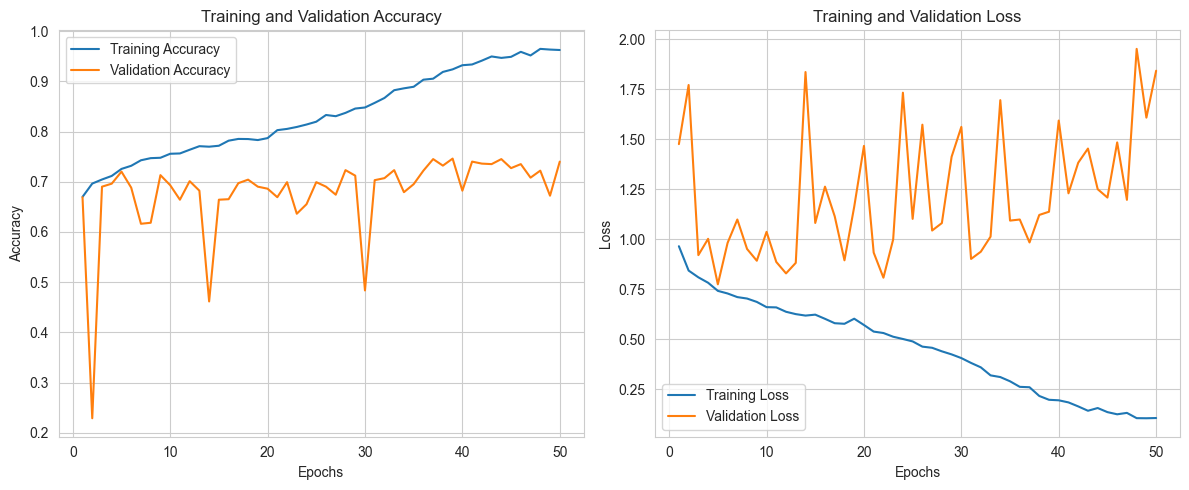

In [10]:
plot_training_history(history)

In [6]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


def evaluate_model(model, data_path, target_size=(299, 299), batch_size=128):

    datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    dataset = datagen.flow_from_directory(
        data_path,
        target_size=target_size,
        batch_size=batch_size,
        shuffle=False
    )


    Y_pred = model.predict(dataset)
    y_pred = np.argmax(Y_pred, axis=1)


    y_true = dataset.classes


    conf_matrix = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix:')
    print(conf_matrix)


    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


    class_report = classification_report(y_true, y_pred)
    print('Classification Report:')
    print(class_report)



    n_classes = Y_pred.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, Y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2,
                 label='Class {} (area = {:.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for multi-class')
    plt.legend(loc="lower right")
    plt.show()

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix_normalized, annot=conf_matrix, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix Heatmap')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

Found 1001 images belonging to 7 classes.
8/8 [==============================] - 5s 386ms/step
Confusion Matrix:
[[ 11  13   2   0   3   3   0]
 [  4  35   3   0   4   5   1]
 [ 14   8  33   0  17  38   0]
 [  0   5   2   0   2   2   0]
 [  4   6  22   0  52  28   0]
 [  2  15  34   0  40 575   4]
 [  0   0   0   0   0   3  11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.34      0.33        32
           1       0.43      0.67      0.52        52
           2       0.34      0.30      0.32       110
           3       0.00      0.00      0.00        11
           4       0.44      0.46      0.45       112
           5       0.88      0.86      0.87       670
           6       0.69      0.79      0.73        14

    accuracy                           0.72      1001
   macro avg       0.44      0.49      0.46      1001
weighted avg       0.72      0.72      0.72      1001



D:\Projects\PythonProjects\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Projects\PythonProjects\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Projects\PythonProjects\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


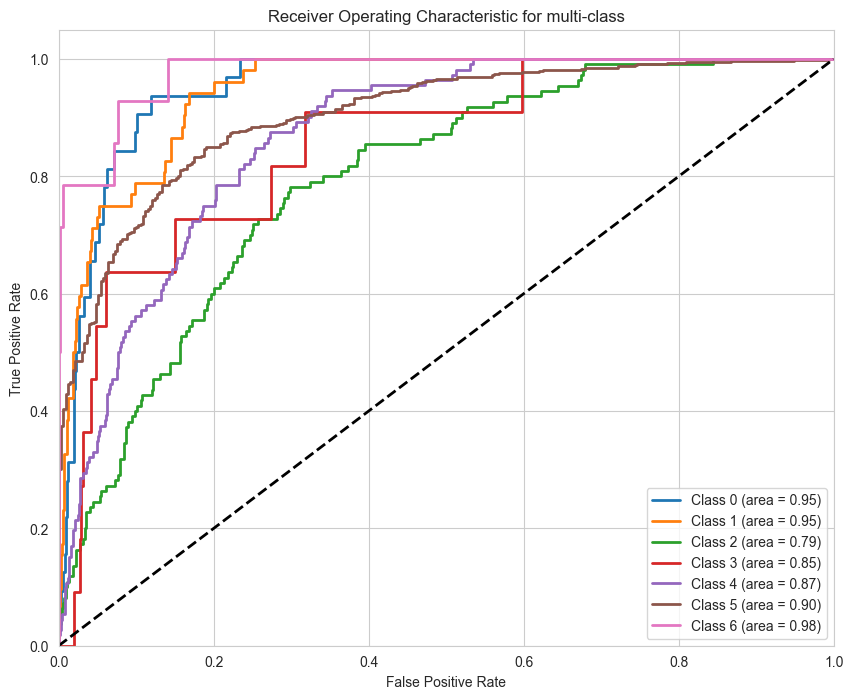

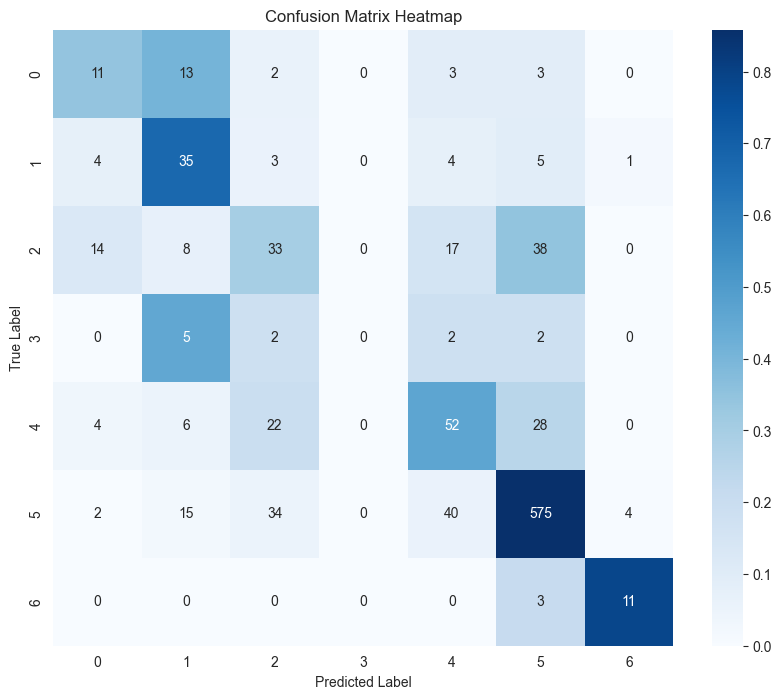

In [7]:
evaluate_model(model,'HAM10000/test')

In [11]:

import tensorflow as tf
import os
import pandas as pd
from tensorflow.keras import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam

# Load data
inputs=tf.keras.Input(shape=(299, 299, 3))
outputs=DS_inception_Model(inputs,2,4,1)
model=tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_126 (Conv2D)            (None, 149, 149, 32  896         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_234 (Batch  (None, 149, 149, 32  128        ['conv2d_126[0][0]']             
 Normalization)                 )                                                           

In [12]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50,
    verbose=1
)

Epoch 1/50
251/251 [==============================] - 38s 134ms/step - loss: 0.9056 - accuracy: 0.6805 - val_loss: 1.5142 - val_accuracy: 0.6693
Epoch 2/50
251/251 [==============================] - 43s 169ms/step - loss: 0.7995 - accuracy: 0.7106 - val_loss: 1.0826 - val_accuracy: 0.6324
Epoch 3/50
251/251 [==============================] - 43s 169ms/step - loss: 0.7673 - accuracy: 0.7223 - val_loss: 3.0970 - val_accuracy: 0.5005
Epoch 4/50
251/251 [==============================] - 43s 170ms/step - loss: 0.7336 - accuracy: 0.7389 - val_loss: 1.0311 - val_accuracy: 0.6553
Epoch 5/50
251/251 [==============================] - 43s 170ms/step - loss: 0.6992 - accuracy: 0.7462 - val_loss: 1.0483 - val_accuracy: 0.6444
Epoch 6/50
251/251 [==============================] - 43s 170ms/step - loss: 0.6894 - accuracy: 0.7470 - val_loss: 0.9032 - val_accuracy: 0.7123
Epoch 7/50
251/251 [==============================] - 43s 171ms/step - loss: 0.6649 - accuracy: 0.7570 - val_loss: 1.0317 - val_ac

In [15]:
model.save('DSI-a2-b4-c1.h5')

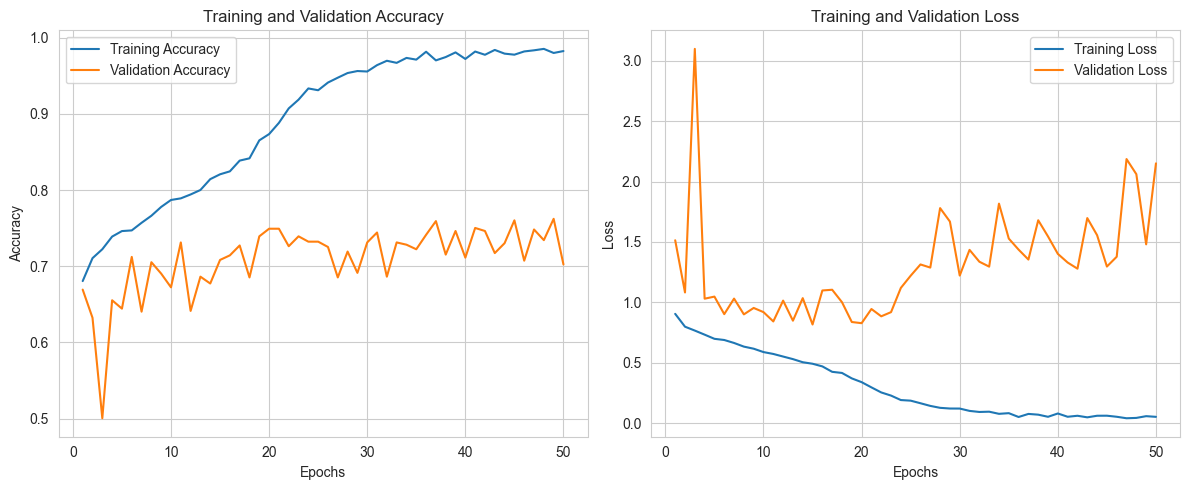

In [13]:
plot_training_history(history)

Found 1001 images belonging to 7 classes.
8/8 [==============================] - 4s 405ms/step
Confusion Matrix:
[[  5   9   3   1   5   8   1]
 [  2  19   2   2   4  22   1]
 [  3   5  24   0  18  59   1]
 [  1   0   2   3   2   3   0]
 [  0   2   9   1  51  48   1]
 [  0   4  14   0  37 614   1]
 [  0   0   0   0   0   3  11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.16      0.23        32
           1       0.49      0.37      0.42        52
           2       0.44      0.22      0.29       110
           3       0.43      0.27      0.33        11
           4       0.44      0.46      0.45       112
           5       0.81      0.92      0.86       670
           6       0.69      0.79      0.73        14

    accuracy                           0.73      1001
   macro avg       0.54      0.45      0.47      1001
weighted avg       0.69      0.73      0.70      1001



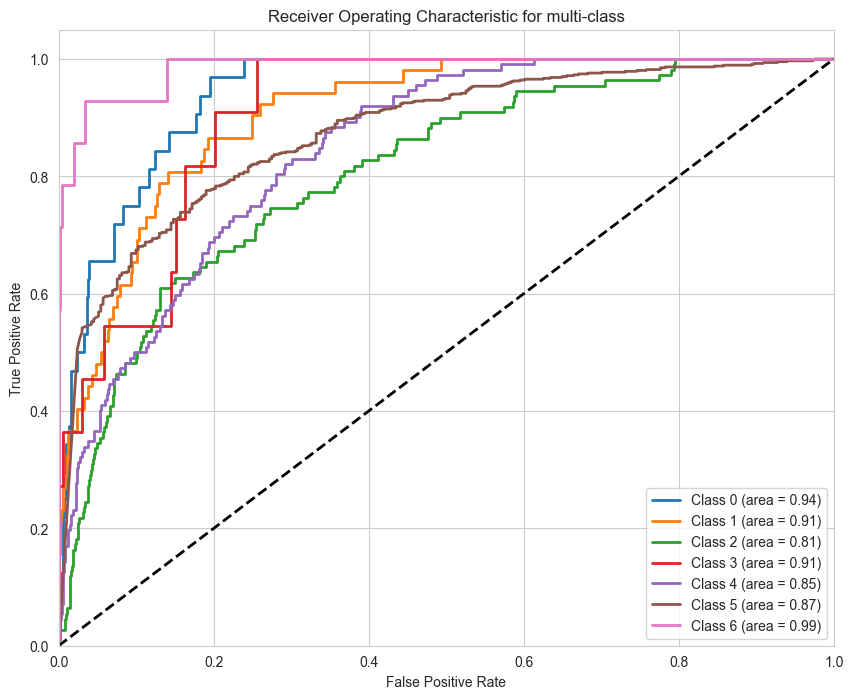

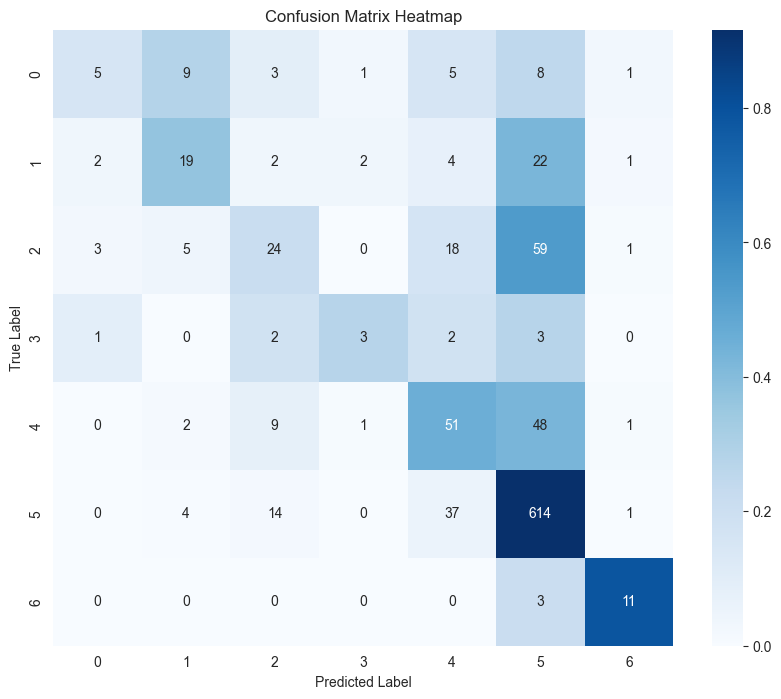

In [14]:
evaluate_model(model,'HAM10000/test')

In [18]:
import tensorflow as tf
import os
from tensorflow.keras import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam

# Load data
inputs=tf.keras.Input(shape=(299, 299, 3))
outputs=DS_inception_Model(inputs,1,1,1)
model=tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_203 (Conv2D)            (None, 149, 149, 32  896         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_383 (Batch  (None, 149, 149, 32  128        ['conv2d_203[0][0]']             
 Normalization)                 )                                                           

In [19]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50,
    verbose=1,
)

Epoch 1/50
251/251 [==============================] - 50s 180ms/step - loss: 0.8907 - accuracy: 0.6871 - val_loss: 1.5349 - val_accuracy: 0.6683
Epoch 2/50
251/251 [==============================] - 44s 176ms/step - loss: 0.7662 - accuracy: 0.7215 - val_loss: 1.0239 - val_accuracy: 0.6154
Epoch 3/50
251/251 [==============================] - 45s 177ms/step - loss: 0.7203 - accuracy: 0.7407 - val_loss: 0.8312 - val_accuracy: 0.7083
Epoch 4/50
251/251 [==============================] - 44s 176ms/step - loss: 0.6961 - accuracy: 0.7463 - val_loss: 1.3048 - val_accuracy: 0.5015
Epoch 5/50
251/251 [==============================] - 44s 176ms/step - loss: 0.6606 - accuracy: 0.7568 - val_loss: 0.8434 - val_accuracy: 0.6983
Epoch 6/50
251/251 [==============================] - 45s 177ms/step - loss: 0.6349 - accuracy: 0.7630 - val_loss: 0.8383 - val_accuracy: 0.7093
Epoch 7/50
251/251 [==============================] - 44s 176ms/step - loss: 0.6096 - accuracy: 0.7707 - val_loss: 0.8771 - val_ac

In [20]:
model.save('DSI-a1-b1-c1.h5')

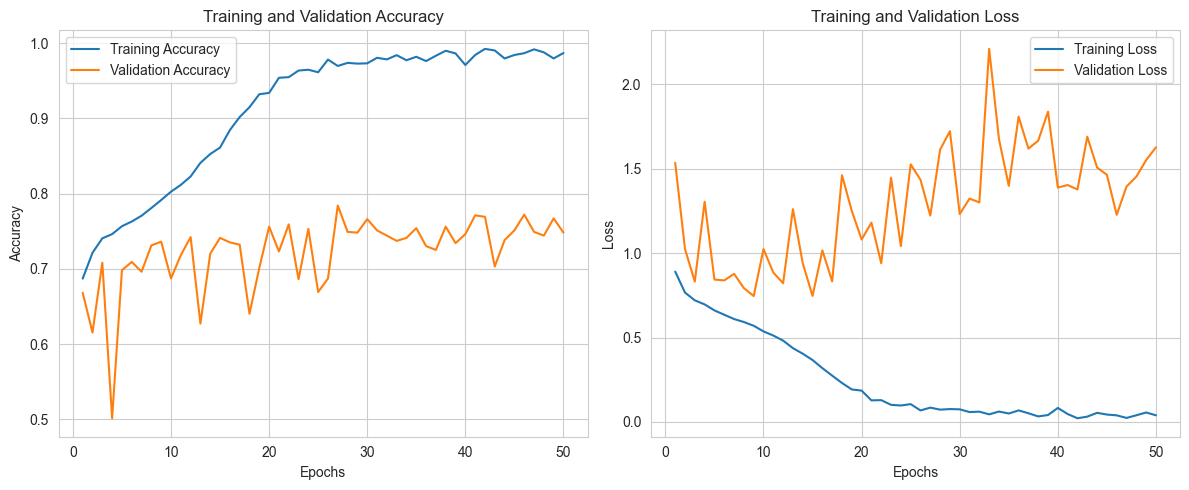

In [21]:
plot_training_history(history)

Found 1001 images belonging to 7 classes.
8/8 [==============================] - 4s 419ms/step
Confusion Matrix:
[[  8   6   4   1  10   3   0]
 [  2  10  13   1   8  17   1]
 [  0   0  46   1  23  40   0]
 [  1   0   2   5   2   1   0]
 [  0   0   9   1  69  33   0]
 [  2   0  12   0  55 600   1]
 [  0   0   0   0   0   3  11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.25      0.36        32
           1       0.62      0.19      0.29        52
           2       0.53      0.42      0.47       110
           3       0.56      0.45      0.50        11
           4       0.41      0.62      0.49       112
           5       0.86      0.90      0.88       670
           6       0.85      0.79      0.81        14

    accuracy                           0.75      1001
   macro avg       0.64      0.52      0.54      1001
weighted avg       0.75      0.75      0.74      1001



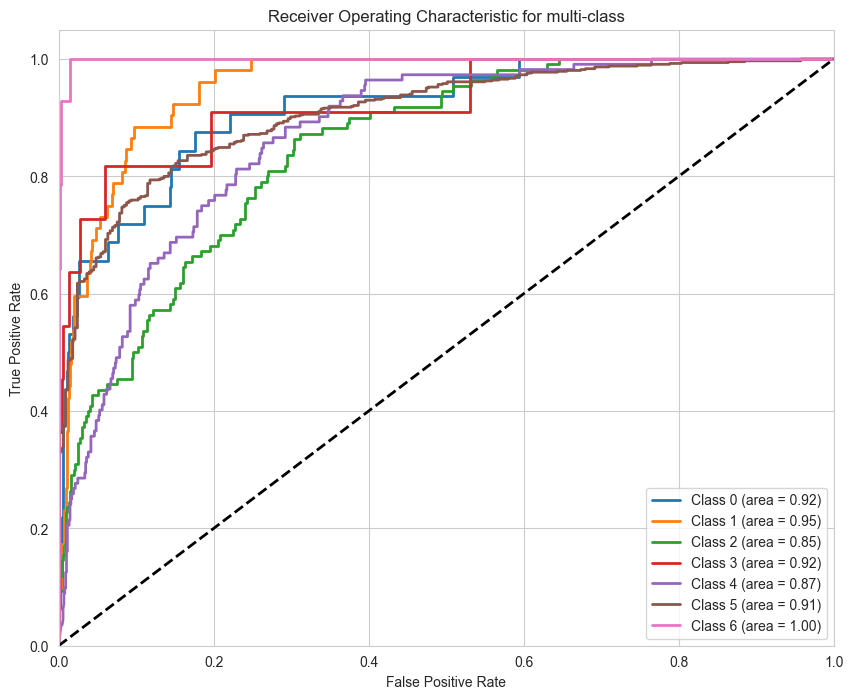

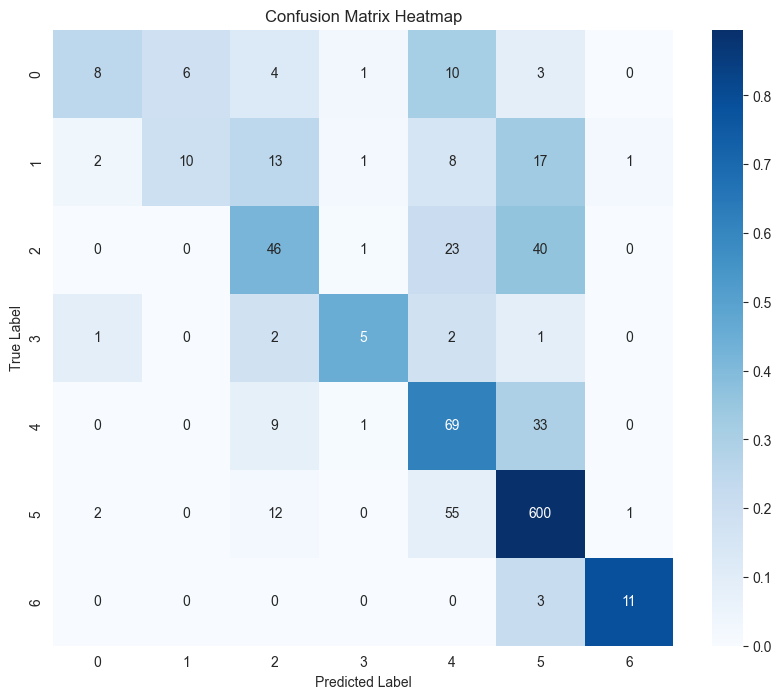

In [22]:
evaluate_model(model,'HAM10000/test')